In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import seaborn as sns
%matplotlib inline 

In [10]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [11]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [12]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')

In [13]:
churnData["TotalCharges"].dtypes

dtype('float64')

In [77]:
churnData['Churn'] = churnData['Churn'].map({'Yes': 1, 'No': 0})

In [78]:
churnData.dropna(inplace = True)

In [79]:
churnData.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [80]:
selected_features = ["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]

X = churnData[selected_features]
y = churnData["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 4)
(1407, 4)
(5625,)
(1407,)


In [81]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

### Logistic Regression

In [82]:
logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7810945273631841


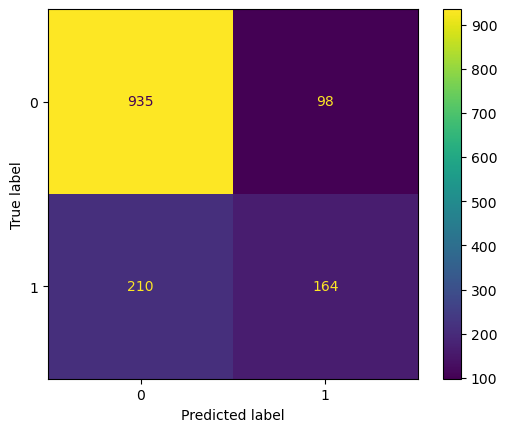

In [83]:
cm = confusion_matrix(y_test, y_pred, labels= logreg_model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

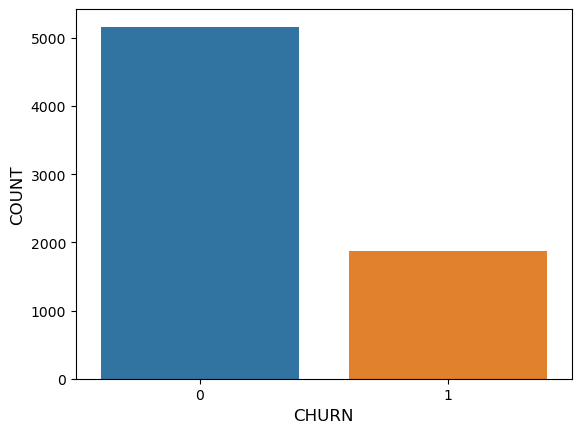

In [111]:
churnknn_count= sns.countplot(x='Churn', data=churnData)
churnknn_count.set_xlabel("CHURN", fontsize=12)
churnknn_count.set_ylabel("COUNT", fontsize=12)
plt.show()

### KNN

In [84]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)

0.7647476901208244


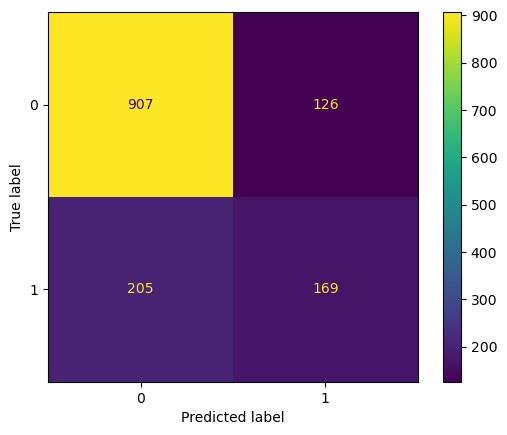

In [85]:
cm = confusion_matrix(y_test, y_pred_knn, labels= knn_model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

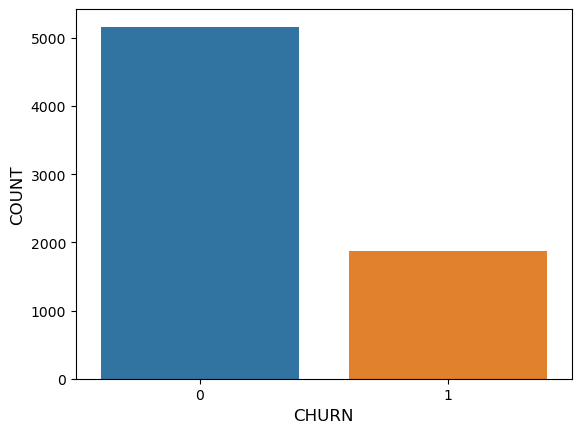

In [115]:
churnknn_count= sns.countplot(x='Churn', data=churnData)
churnknn_count.set_xlabel("CHURN", fontsize=12)
churnknn_count.set_ylabel("COUNT", fontsize=12)
plt.show()

### DECISION TREE

In [86]:
clf = DecisionTreeClassifier(random_state=42)

In [87]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [88]:
y_pred = clf.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7235252309879175


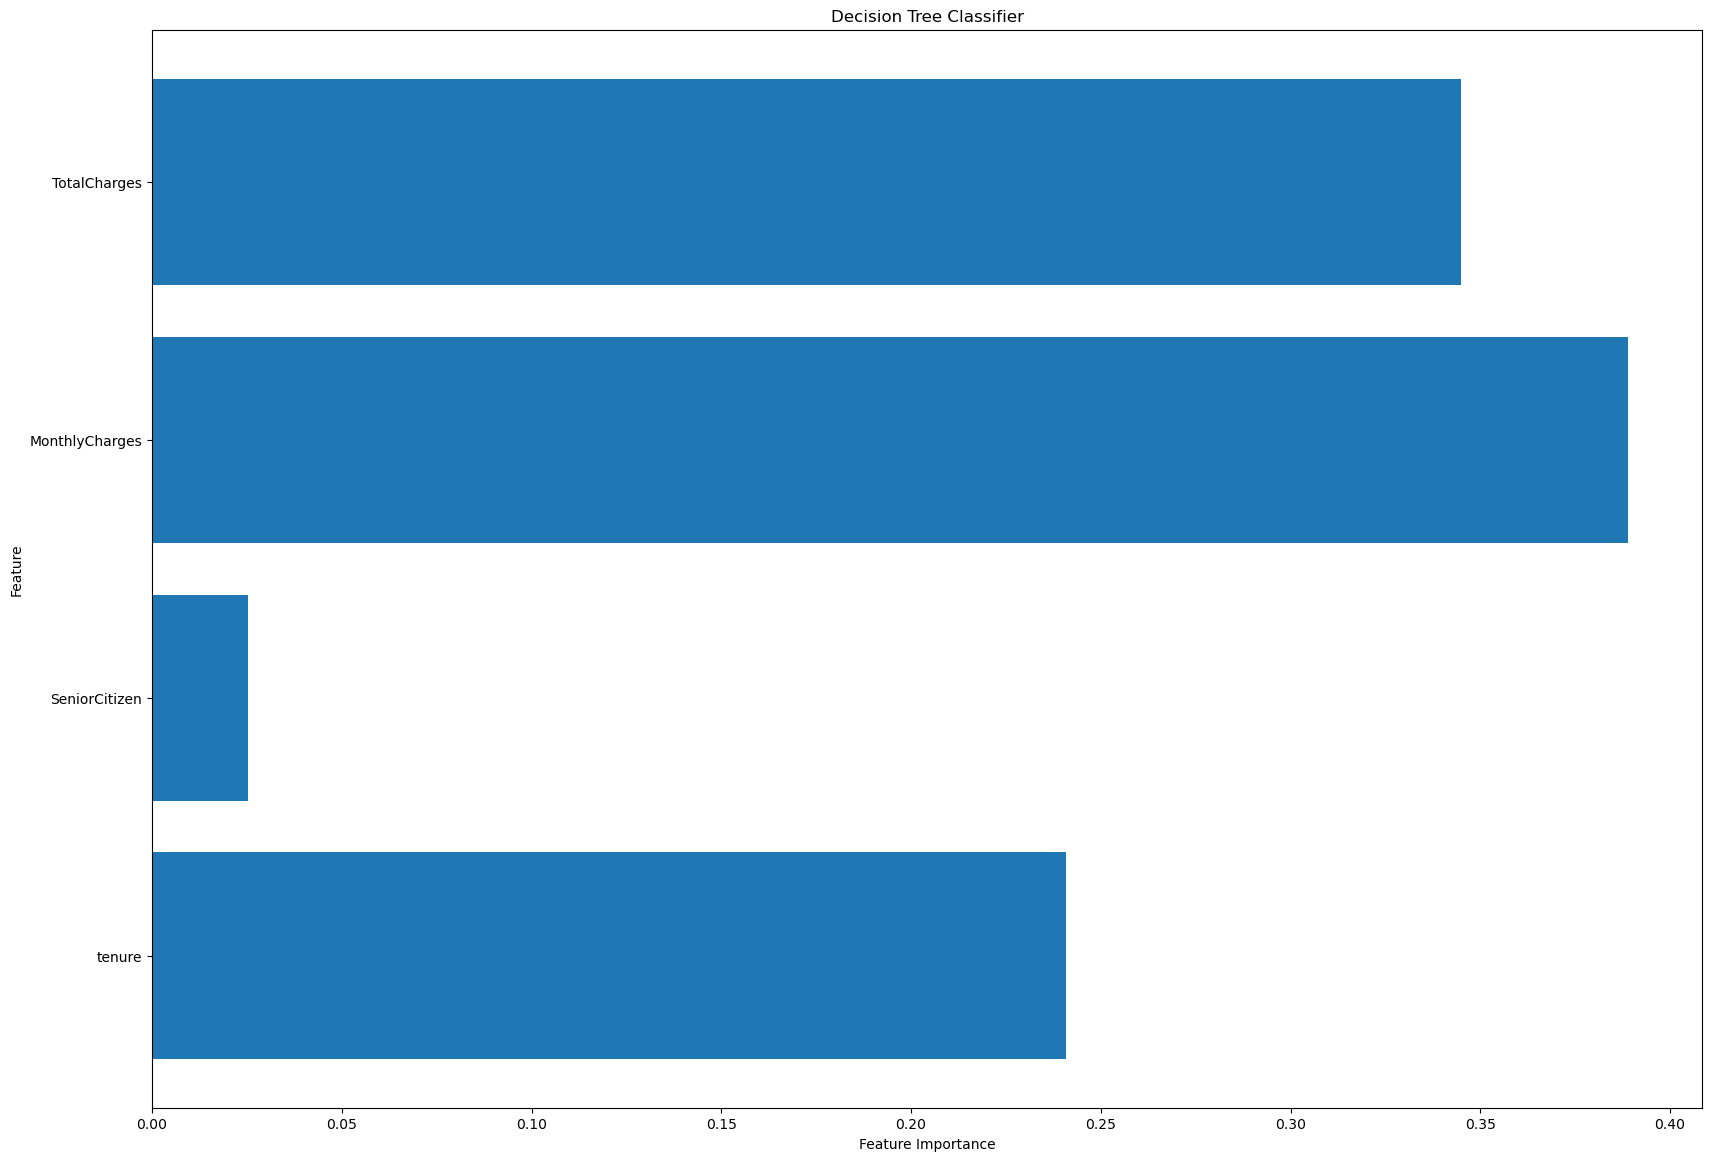

In [90]:
plt.figure(figsize=(20, 14))
plt.barh(X.columns, clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Classifier')
plt.show()

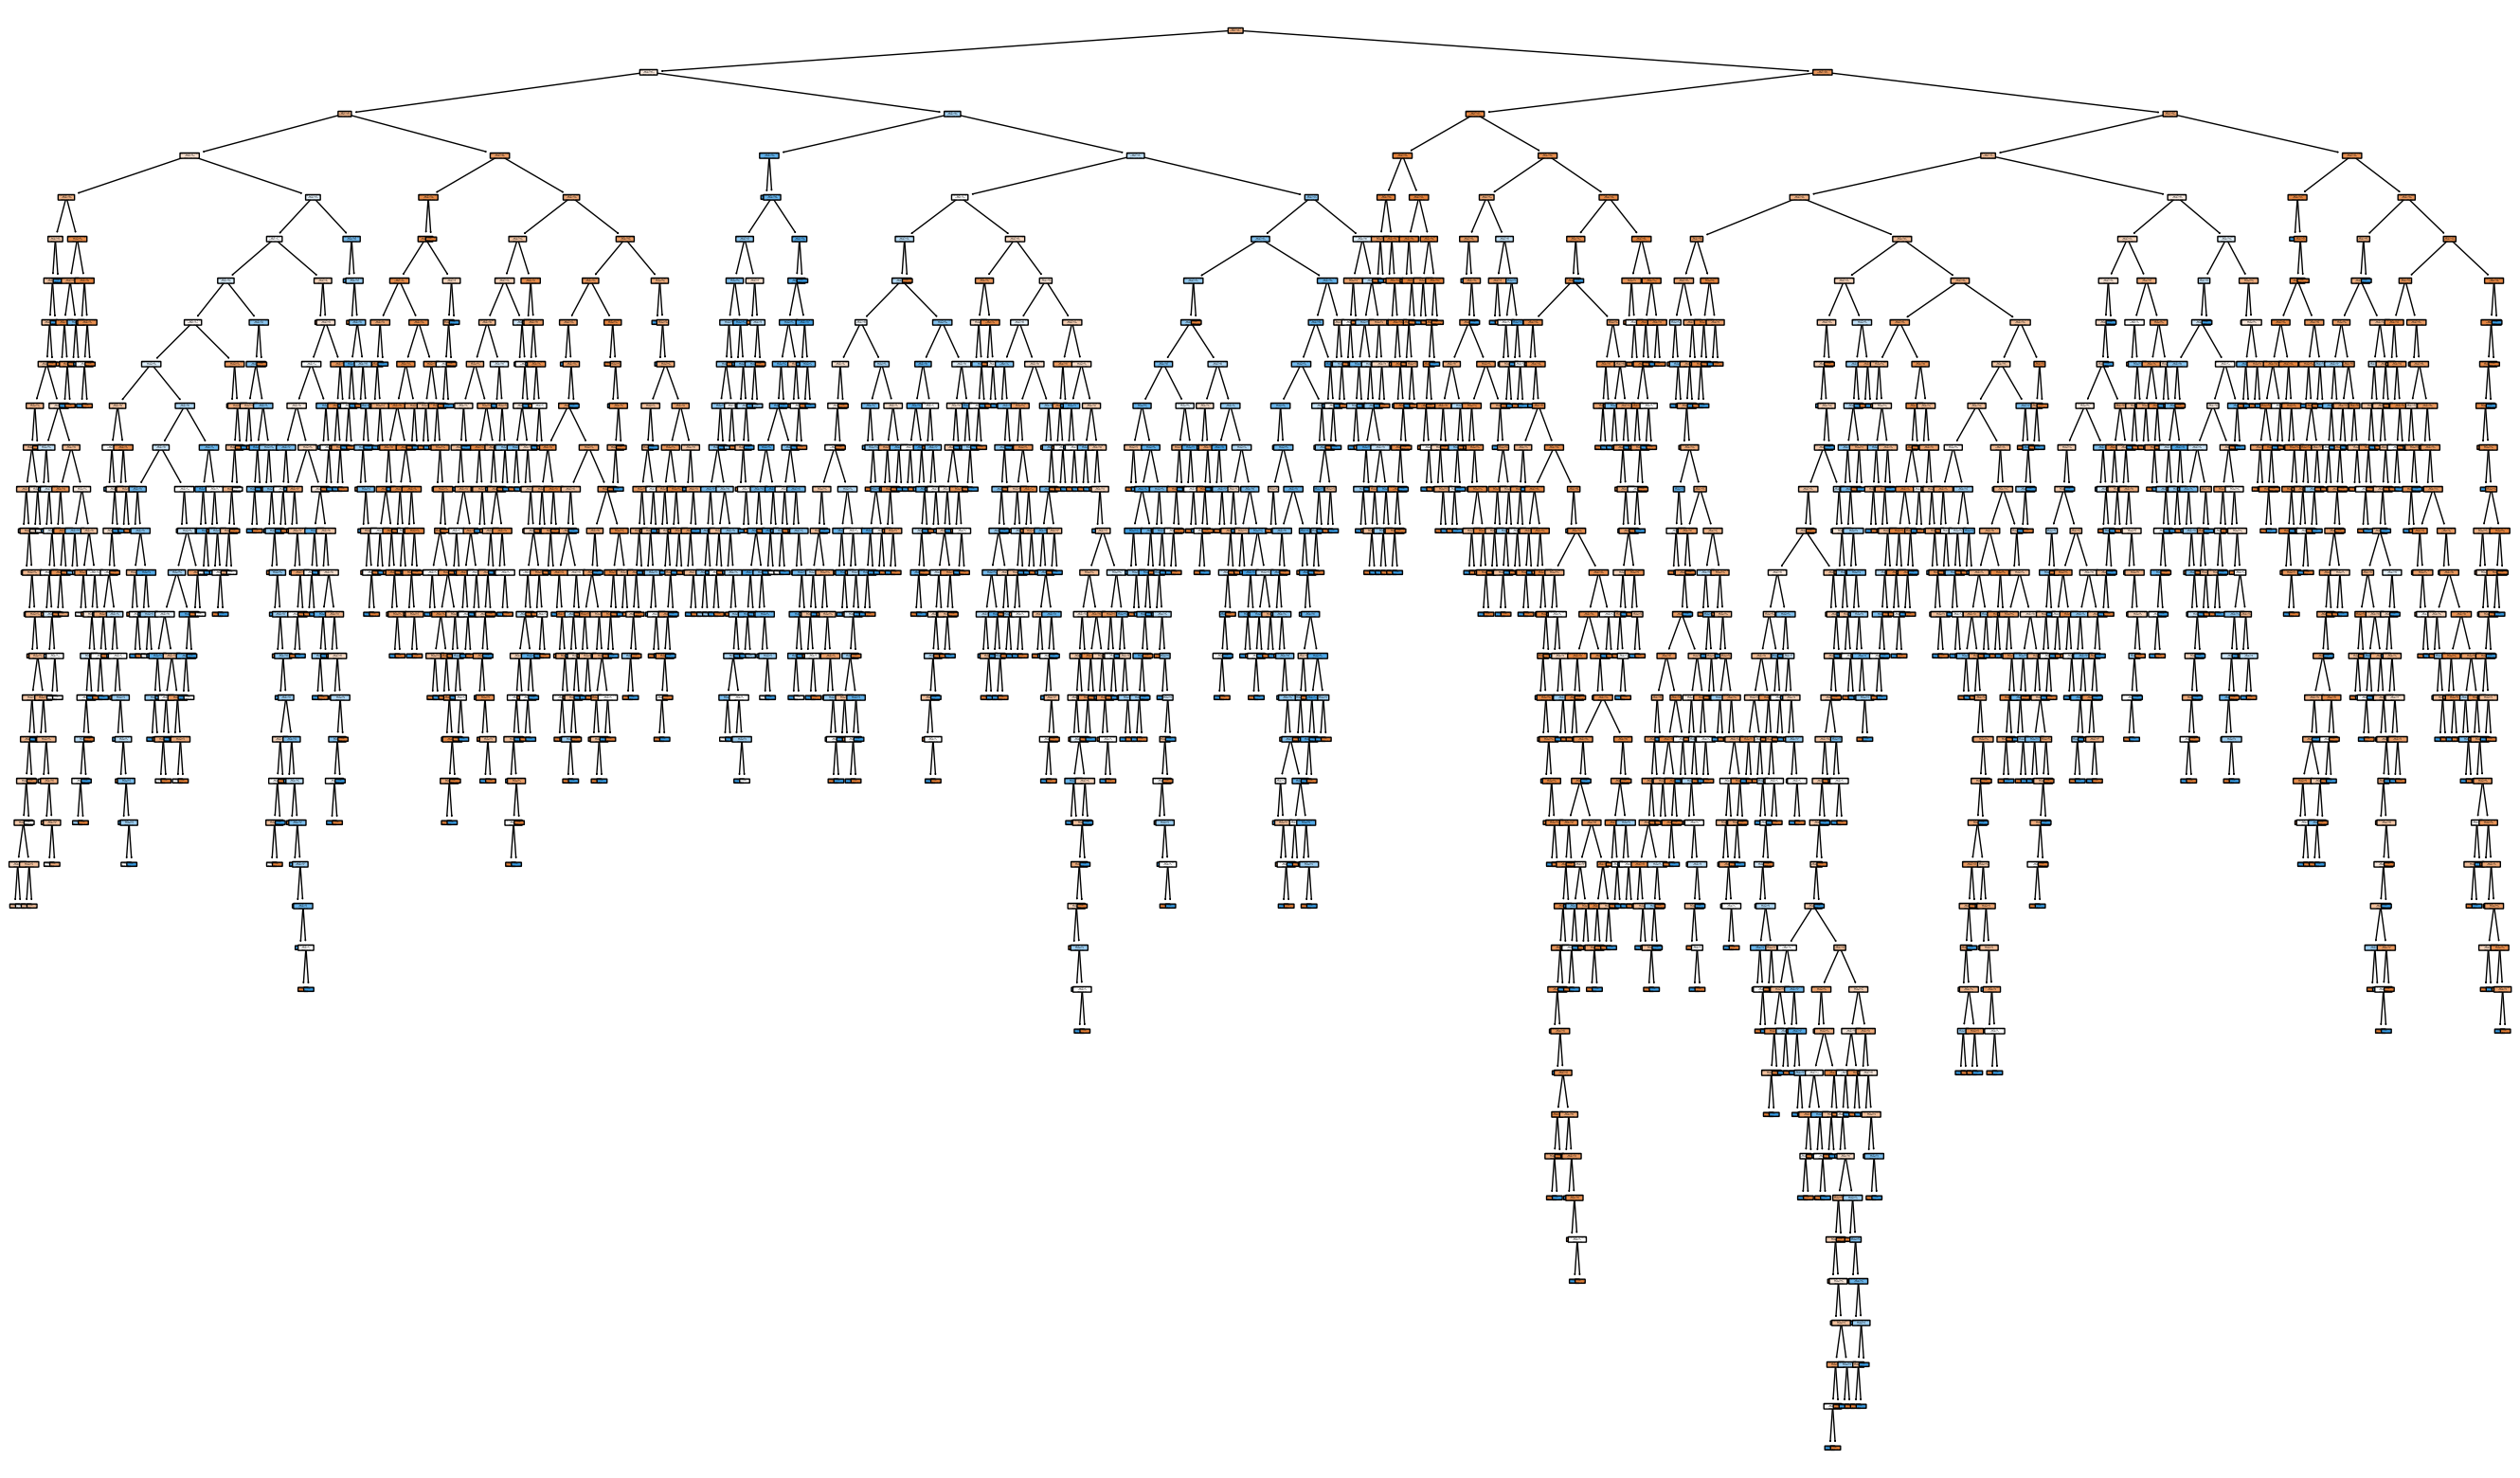

In [91]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(clf,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show() 

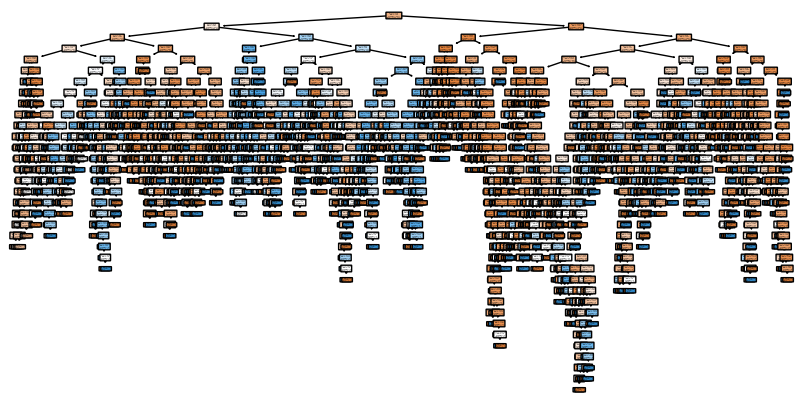

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5))

plot_tree(clf,filled = True, rounded=True)
plt.show()

### SMOTE TTS

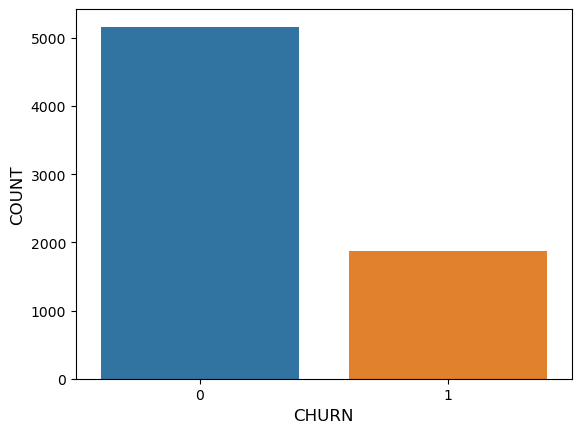

In [117]:
churn_count= sns.countplot(x='Churn', data=churnData)
churn_count.set_xlabel("CHURN", fontsize=12)
churn_count.set_ylabel("COUNT", fontsize=12)
plt.show()

In [98]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [101]:
y_train_res = pd.DataFrame(y_train_res)

In [102]:
y_train_res

,Churn
0,1
1,1
2,1
3,0
4,0
...,...
8255,1
8256,1
8257,1
8258,1


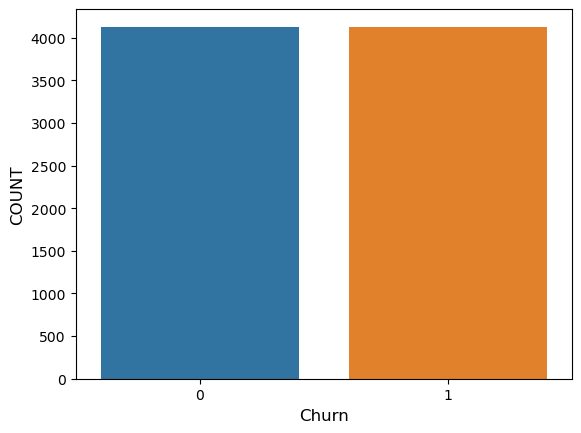

In [104]:
churn_count= sns.countplot(x='Churn', data=y_train_res)
churn_count.set_xlabel("Churn", fontsize=12)
churn_count.set_ylabel("COUNT", fontsize=12)
plt.show()